In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


# enter location of the Data file with the format as 'excel'
#loc = input("Enter file Location :") 
# creating 4 different dataframes with different pieces of information regarding crop growth
plants = pd.read_excel("Data.xlsx",sheet_name='plants')
flight_dates = pd.read_excel("Data.xlsx",sheet_name='flight dates')
planting = pd.read_excel("Data.xlsx",sheet_name='planting')
weather = pd.read_excel("Data.xlsx",sheet_name='weather')

plants.head(15)

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
5,402,2020-04-11,2,14.0,NaN,NaN,NaN,NaN,10.0,NaN,206.0,208,2020-04-30,NaT,NaN
6,402,2020-04-11,2,21.0,NaN,NaN,NaN,NaN,11.0,NaN,236.0,208,2020-04-30,NaT,NaN
7,402,2020-04-11,3,14.0,NaN,NaN,NaN,NaN,11.0,NaN,159.0,208,2020-04-30,NaT,NaN
8,402,2020-04-11,2,13.0,NaN,NaN,NaN,NaN,11.0,NaN,205.0,208,2020-04-30,NaT,NaN
9,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,11.0,NaN,165.0,208,2020-04-30,NaT,NaN


In [65]:
#removing rows with Remove column NOT Empty
print(plants.shape)
rows_to_remove = plants[plants['Remove'].isnull()==False].index
plants.drop(index=rows_to_remove,inplace=True)
print(plants.shape)

#Since there is no further need for the Remove column, we can drop it.
plants.drop(columns='Remove',inplace=True)
plants.head()

(4859, 15)
(4789, 15)


,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT


In [66]:
#removing rows with Plant Date Empty
print(plants.shape)
plant_date_empty = plants[plants['Plant Date'].isnull()==True].index
plants.drop(index = plant_date_empty,inplace=True)
print(plants.shape)

(4789, 14)
(4615, 14)


Getting information about various columns in the plants dataframe.

In [67]:
plants.info()
flight_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4858
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4615 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4615 non-null   int64         
 3   Fresh Weight (g)      4614 non-null   float64       
 4   Head Weight (g)       4510 non-null   float64       
 5   Radial Diameter (mm)  4510 non-null   float64       
 6   Polar Diameter (mm)   4510 non-null   float64       
 7   Diameter Ratio        4508 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4428 non-null   float64       
 10  Leaf Area (cm^2)      4613 non-null   float64       
 11  Square ID             4615 non-null   int64         
 12  Check Date            4615 non-null   datetime64[ns]
 13  Flight Date       

Only one of these measurements are needed : [fresh weight, head weight, polar diameter, radial diameter] or [fresh weight, number of leaves]. In that case there are only a total of 5 rows with missing values for all four parameters : head weight, polar diameter, radial diameter and number of leaves. They have to be filled in based on the growth cycle of the plant in question. There is one plant missing Fresh Weight which has to be corrected.

Apart from this Flight Date has to be filled up with the dates from the flight_dates dataframe.

### Dealing with Dates in 'plants' dataframe

In [68]:
#filling up the missing values for Flight Date 
plants_sort = plants.copy()
flight_dates_sort = flight_dates.copy()
plants_sort = plants.sort_values('Batch Number')
flight_dates_sort = flight_dates.sort_values('Batch Number')


b=0
k=list(plants_sort['Batch Number'])
for i in flight_dates_sort['Batch Number'] :
    a=0
    for j in k:
        m=plants_sort[plants_sort['Batch Number']==j].index
        if i==j:
            if type(plants_sort['Flight Date'][m[a]]) == pd._libs.tslibs.nattype.NaTType:
                plants_sort['Flight Date'][m[a]]=flight_dates_sort['Flight Date'][b]
        else:
            break
        a+=1
    k=[a for a in plants_sort['Batch Number'] if a>i]
    b+=1
           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [69]:
plants_sort.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4786
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4615 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4615 non-null   int64         
 3   Fresh Weight (g)      4614 non-null   float64       
 4   Head Weight (g)       4510 non-null   float64       
 5   Radial Diameter (mm)  4510 non-null   float64       
 6   Polar Diameter (mm)   4510 non-null   float64       
 7   Diameter Ratio        4508 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4428 non-null   float64       
 10  Leaf Area (cm^2)      4613 non-null   float64       
 11  Square ID             4615 non-null   int64         
 12  Check Date            4615 non-null   datetime64[ns]
 13  Flight Date       

As we can see there are still some missing values of flight date in the plants_sort dataframe. Let's try and understand why!

In [70]:
plants_sort[plants_sort['Flight Date'].isnull()==True]['Batch Number'].unique()

array([694, 695, 698, 699, 700, 701, 730, 731, 732, 733, 735, 736, 738,
       739])

From the above output, we understand that the batch number with null values in the flight date column are the ones for which the flight date isn't provided in neither the plants_sort dataframe nor the flight_dates_sort dataframe. Hence there is no way to gain this information. The only reasonable step now would be to drop the rows which do not have flight date available anywhere for a given batch number.

In [71]:
plants_sort.drop(plants_sort[plants_sort['Flight Date'].isnull()==True].index,axis=0,inplace=True)

After dealing with all the missing values, the next step would be to make these date columns usable as features. Hence here two new columns have been added into the plants_sort dataframe that count the number of days from the plant date to the flight date and check date respectively.

In [72]:
growth_diff = (plants_sort['Flight Date'] - plants_sort['Plant Date'])
growth_diff = growth_diff.dt.days
growth_check = (plants_sort['Check Date'] - plants_sort['Plant Date'])
growth_check = growth_check.dt.days
plants_sort['Flight_In_Dates'] = growth_diff.astype('int')
plants_sort['Checked_In_Dates'] = growth_check.astype('int')

plants_sort

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Flight_In_Dates,Checked_In_Dates
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,19,19
83,402,2020-04-11,2,209.0,12.0,50.0,50.0,1.000000,NaN,0.183346,795.0,570,2020-05-22,2020-04-30,19,41
84,402,2020-04-11,3,186.0,30.0,70.0,65.0,1.076923,NaN,0.179893,633.0,570,2020-05-22,2020-04-30,19,41
85,402,2020-04-11,1,152.0,7.0,30.0,30.0,1.000000,NaN,0.495149,594.0,570,2020-05-22,2020-04-30,19,41
86,402,2020-04-11,2,228.0,15.0,50.0,50.0,1.000000,NaN,0.229183,853.0,570,2020-05-22,2020-04-30,19,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,693,2020-08-08,2,119.0,11.0,45.0,50.0,0.900000,NaN,0.207491,700.0,85,2020-09-10,2020-09-10,33,33
3138,693,2020-08-08,5,96.0,9.0,30.0,30.0,1.000000,NaN,0.636620,604.0,85,2020-09-10,2020-09-10,33,33
3137,693,2020-08-08,2,102.0,4.0,30.0,30.0,1.000000,NaN,0.282942,682.0,85,2020-09-10,2020-09-10,33,33
3558,693,2020-08-08,2,183.0,10.0,50.0,45.0,1.111111,NaN,0.169765,370.0,290,2020-09-17,2020-09-10,33,40


### Fresh Weight Correction

A single value is missing from the Fresh Weight column from the plants_sort dataframe. The approach here would be to try and find a plant of similar features and assign the fresh weight to the missing row.

In [73]:
plants_sort[plants_sort['Fresh Weight (g)'].isnull()==True]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Flight_In_Dates,Checked_In_Dates
1087,511,2020-06-04,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496,2020-07-20,2020-07-15,41,46


In [74]:
plants_sort[(plants_sort['Fresh Weight (g)'].isnull()==False) & (plants_sort['Class']==3) & (plants_sort['Flight_In_Dates']==max(plants_sort['Flight_In_Dates']))]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Flight_In_Dates,Checked_In_Dates
516,469,2020-05-19,3,1049.0,682.0,160.0,140.0,1.142857,NaN,0.363427,637.0,521,2020-07-06,2020-07-06,48,48
521,469,2020-05-19,3,881.0,440.0,150.0,135.0,1.111111,NaN,0.276655,425.0,521,2020-07-06,2020-07-06,48,48
522,469,2020-05-19,3,1011.0,520.0,142.0,133.0,1.067669,NaN,0.370319,419.0,521,2020-07-06,2020-07-06,48,48
520,469,2020-05-19,3,959.0,486.0,135.0,132.0,1.022727,NaN,0.385830,418.0,521,2020-07-06,2020-07-06,48,48


Since there are 4 rows with similar data to the one we're trying to correct, we're going to use mean imputation of all these rows.

In [75]:
correction = plants_sort[(plants_sort['Fresh Weight (g)'].isnull()==False) & (plants_sort['Class']==3) & (plants_sort['Flight_In_Dates']==max(plants_sort['Flight_In_Dates']))]
correction = correction.mean(axis=0)

plants_sort.loc[746,'Fresh Weight (g)']=correction['Fresh Weight (g)']
plants_sort.loc[746,'Head Weight (g)']=correction['Head Weight (g)']
plants_sort.loc[746,'Radial Diameter (mm)']=correction['Radial Diameter (mm)']
plants_sort.loc[746,'Polar Diameter (mm)']=correction['Polar Diameter (mm)']
plants_sort.loc[746,'Diameter Ratio']=correction['Diameter Ratio']
plants_sort.loc[746,'Square ID']=correction['Square ID']



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [76]:
#checking if Fresh Weight doesnt have any null values anymore
plants_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          3294 non-null   float64       
 1   Plant Date            3294 non-null   datetime64[ns]
 2   Class                 3294 non-null   float64       
 3   Fresh Weight (g)      3294 non-null   float64       
 4   Head Weight (g)       3197 non-null   float64       
 5   Radial Diameter (mm)  3197 non-null   float64       
 6   Polar Diameter (mm)   3197 non-null   float64       
 7   Diameter Ratio        3196 non-null   float64       
 8   Leaves                95 non-null     float64       
 9   Density (kg/L)        3195 non-null   float64       
 10  Leaf Area (cm^2)      3293 non-null   float64       
 11  Square ID             3295 non-null   float64       
 12  Check Date            3294 non-null   datetime64[ns]
 13  Flight Date        

### Correction of Leaves or Diameters based on Growth

In [77]:
plants_sort[(plants_sort['Polar Diameter (mm)'].isnull()==True) & (plants_sort['Leaves'].isnull()==True)]

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Flight_In_Dates,Checked_In_Dates
247,466.0,2020-05-18,5.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,263.0,426.0,2020-07-01,2020-07-01,44.0,44.0
442,475.0,2020-05-21,1.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,261.0,672.0,2020-07-03,2020-07-03,43.0,43.0
1087,511.0,2020-06-04,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1496.0,2020-07-20,2020-07-15,41.0,46.0


Since all the plants appear in the later stages of their growth cycle, we will update their Radial Diameter and Polar Diameter.

In [78]:
correct = plants_sort[(plants_sort['Radial Diameter (mm)'].isnull()==False) & (plants_sort['Fresh Weight (g)']==108)& (plants_sort['Class']==5)]
correct = correct.mean(axis=0)

plants_sort.loc[247,'Density (kg/L)']=correct['Density (kg/L)']
plants_sort.loc[247,'Head Weight (g)']=correct['Head Weight (g)']
plants_sort.loc[247,'Radial Diameter (mm)']=correct['Radial Diameter (mm)']
plants_sort.loc[247,'Polar Diameter (mm)']=correct['Polar Diameter (mm)']
plants_sort.loc[247,'Diameter Ratio']=correct['Diameter Ratio']
plants_sort.loc[247,'Square ID']=correct['Square ID']

correct = plants_sort[(plants_sort['Radial Diameter (mm)'].isnull()==False) & (plants_sort['Fresh Weight (g)']==92)& (plants_sort['Class']==1)]
correct = correct.mean(axis=0)

plants_sort.loc[522,'Density (kg/L)']=correct['Density (kg/L)']
plants_sort.loc[522,'Head Weight (g)']=correct['Head Weight (g)']
plants_sort.loc[522,'Radial Diameter (mm)']=correct['Radial Diameter (mm)']
plants_sort.loc[522,'Polar Diameter (mm)']=correct['Polar Diameter (mm)']
plants_sort.loc[522,'Diameter Ratio']=correct['Diameter Ratio']
plants_sort.loc[522,'Square ID']=correct['Square ID']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  if sys.path[0] == '':


In [79]:
plants_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 746
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          3294 non-null   float64       
 1   Plant Date            3294 non-null   datetime64[ns]
 2   Class                 3294 non-null   float64       
 3   Fresh Weight (g)      3294 non-null   float64       
 4   Head Weight (g)       3198 non-null   float64       
 5   Radial Diameter (mm)  3198 non-null   float64       
 6   Polar Diameter (mm)   3198 non-null   float64       
 7   Diameter Ratio        3197 non-null   float64       
 8   Leaves                95 non-null     float64       
 9   Density (kg/L)        3196 non-null   float64       
 10  Leaf Area (cm^2)      3293 non-null   float64       
 11  Square ID             3295 non-null   float64       
 12  Check Date            3294 non-null   datetime64[ns]
 13  Flight Date        

### Number of Plants in each class

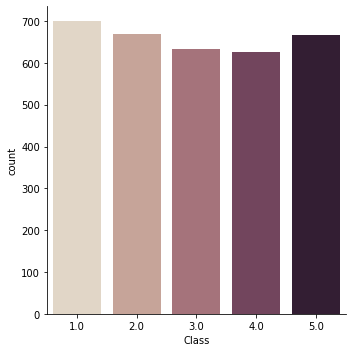

In [80]:
sns.catplot(x="Class", kind="count", palette="ch:.25", data=plants_sort)
plt.savefig("class_dist.png")
plt.show()

__Observation from plot :__ The number of plants in each class dont show a significant difference and hence there is no need to adjust data distribution using oversampling or undersampling.


### Dropping Unnecessary Columns

To decide which column to drop, we can calculate the correlation among the features.

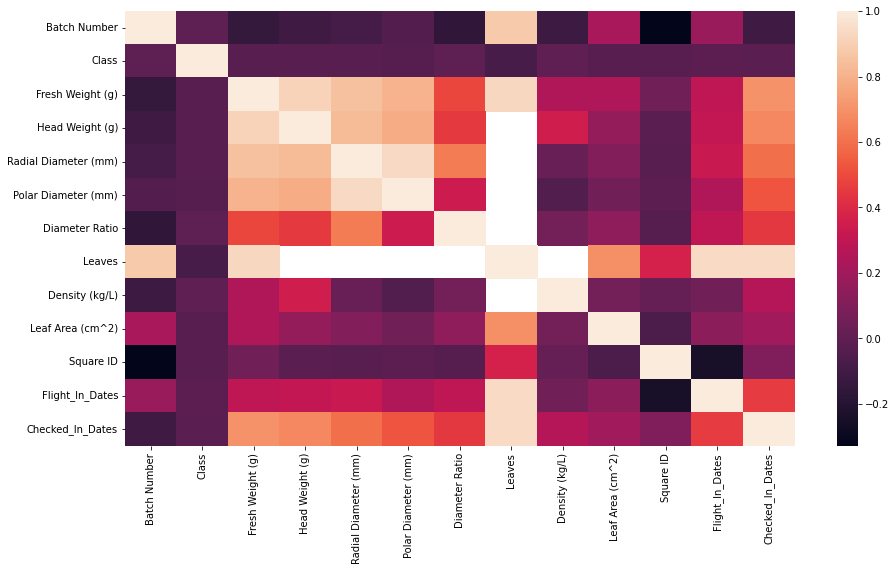

In [81]:
figure_, axes_ = plt.subplots(figsize=(15, 8))
axes = sns.heatmap(plants_sort.corr())
plt.savefig("correlation.png")
plt.show()


Based on the above info, we are dropping Density and Diameter Ratio from the dataframe.

In [82]:
plants_sort.drop(columns=['Diameter Ratio','Density (kg/L)'],inplace=True)
plants_sort['Flight Year'] = plants_sort['Flight Date'].dt.year.to_list()
plants_sort['Flight Month'] = plants_sort['Flight Date'].dt.month.to_list()
plants_sort.head(10)

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,Check Date,Flight Date,Flight_In_Dates,Checked_In_Dates,Flight Year,Flight Month
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,2020-04-30,2020-04-30,19.0,19.0,2020.0,4.0
83,402.0,2020-04-11,2.0,209.0,12.0,50.0,50.0,NaN,795.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
84,402.0,2020-04-11,3.0,186.0,30.0,70.0,65.0,NaN,633.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
85,402.0,2020-04-11,1.0,152.0,7.0,30.0,30.0,NaN,594.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
86,402.0,2020-04-11,2.0,228.0,15.0,50.0,50.0,NaN,853.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
87,402.0,2020-04-11,1.0,260.0,47.0,70.0,75.0,NaN,967.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
88,402.0,2020-04-11,5.0,223.0,13.0,50.0,50.0,NaN,963.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
82,402.0,2020-04-11,5.0,200.0,21.0,60.0,60.0,NaN,734.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
89,402.0,2020-04-11,3.0,239.0,12.0,35.0,40.0,NaN,848.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0
91,402.0,2020-04-11,2.0,287.0,34.0,70.0,70.0,NaN,938.0,570.0,2020-05-22,2020-04-30,19.0,41.0,2020.0,4.0


In [83]:
plants_sort['Flight Month'].unique()

array([ 4.,  5.,  7.,  6.,  8.,  9., nan])

### Cleaning the Weather Dataframe

In [84]:
#renaming the first column
weather.rename(columns={'Unnamed: 0' :'Weather Date'}, inplace=True)


weather['Month'] = weather['Weather Date'].dt.month.to_list()
weather['Year'] = weather['Weather Date'].dt.year.to_list()

weather.head()

,Weather Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result],Month,Year
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN,5,2014
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6,5,2014
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9,5,2014
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6,5,2014
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2,5,2014


In [85]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Weather Date             2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   int64         
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Wind Speed [max]         2556 non-null   float64       
 5   Battery Voltage [last]   2556 non-null   int64         
 6   Leaf Wetness [time]      2556 non-null   int64         
 7   Air Temperature [avg]    2556 non-null   float64       
 8   Air Temperature [max]    2556 non-null   float64       
 9   Air Temperature [min]    2556 non-null   float64       
 10  Relative Humidity [avg]  2556 non-null   float64       
 11  Dew Point [avg]          2553 non-null   float64       
 12  Dew Point [min]          2510 non-

### Mean Imputation of missing values in the Weather Dataframe

In [86]:
dp_avg_mean = weather[weather['Dew Point [avg]'].isnull()==False]['Dew Point [avg]'].mean()
dp_min_mean = weather[weather['Dew Point [min]'].isnull()==False]['Dew Point [min]'].mean()
ET0_mean  = weather[weather['ET0 [result]'].isnull()==False]['ET0 [result]'].mean()
values = {"ET0 [result]": ET0_mean,'Dew Point [min]':dp_min_mean,'Dew Point [avg]':dp_avg_mean}
weather.fillna(value=values,inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Weather Date             2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   int64         
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Wind Speed [max]         2556 non-null   float64       
 5   Battery Voltage [last]   2556 non-null   int64         
 6   Leaf Wetness [time]      2556 non-null   int64         
 7   Air Temperature [avg]    2556 non-null   float64       
 8   Air Temperature [max]    2556 non-null   float64       
 9   Air Temperature [min]    2556 non-null   float64       
 10  Relative Humidity [avg]  2556 non-null   float64       
 11  Dew Point [avg]          2556 non-null   float64       
 12  Dew Point [min]          2556 non-

### Integrating the Weather Data

To avoid data leakage, weather data has to be partitioned based on years so as to avoid using future weather information. This info is present in the weather dataframe. 

In [87]:
df = plants_sort.merge(weather, how='inner', left_on='Flight Date', right_on='Weather Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 3293
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Batch Number             3294 non-null   float64       
 1   Plant Date               3294 non-null   datetime64[ns]
 2   Class                    3294 non-null   float64       
 3   Fresh Weight (g)         3293 non-null   float64       
 4   Head Weight (g)          3197 non-null   float64       
 5   Radial Diameter (mm)     3197 non-null   float64       
 6   Polar Diameter (mm)      3197 non-null   float64       
 7   Leaves                   95 non-null     float64       
 8   Leaf Area (cm^2)         3293 non-null   float64       
 9   Square ID                3294 non-null   float64       
 10  Check Date               3294 non-null   datetime64[ns]
 11  Flight Date              3294 non-null   datetime64[ns]
 12  Flight_In_Dates          3294 non-

In [88]:
df['Plant Flight Difference'] = (df['Flight Date'] - df['Plant Date']).dt.days
df['Plant Check Difference'] = (df['Check Date'] - df['Plant Date']).dt.days
df['Flight Check Difference'] = (df['Check Date'] - df['Flight Date']).dt.days

df

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Leaves,Leaf Area (cm^2),Square ID,...,Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result],Month,Year,Plant Flight Difference,Plant Check Difference,Flight Check Difference
0,402.0,2020-04-11,3.0,15.0,NaN,NaN,NaN,10.0,185.0,208.0,...,6.03,89.02,7.3,5.7,1.9,4,2020,19,19,0
1,402.0,2020-04-11,2.0,209.0,12.0,50.0,50.0,NaN,795.0,570.0,...,6.03,89.02,7.3,5.7,1.9,4,2020,19,41,22
2,402.0,2020-04-11,3.0,186.0,30.0,70.0,65.0,NaN,633.0,570.0,...,6.03,89.02,7.3,5.7,1.9,4,2020,19,41,22
3,402.0,2020-04-11,1.0,152.0,7.0,30.0,30.0,NaN,594.0,570.0,...,6.03,89.02,7.3,5.7,1.9,4,2020,19,41,22
4,402.0,2020-04-11,2.0,228.0,15.0,50.0,50.0,NaN,853.0,570.0,...,6.03,89.02,7.3,5.7,1.9,4,2020,19,41,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,693.0,2020-08-08,2.0,119.0,11.0,45.0,50.0,NaN,700.0,85.0,...,2.69,78.37,7.0,2.5,2.3,9,2020,33,33,0
3290,693.0,2020-08-08,5.0,96.0,9.0,30.0,30.0,NaN,604.0,85.0,...,2.69,78.37,7.0,2.5,2.3,9,2020,33,33,0
3291,693.0,2020-08-08,2.0,102.0,4.0,30.0,30.0,NaN,682.0,85.0,...,2.69,78.37,7.0,2.5,2.3,9,2020,33,33,0
3292,693.0,2020-08-08,2.0,183.0,10.0,50.0,45.0,NaN,370.0,290.0,...,2.69,78.37,7.0,2.5,2.3,9,2020,33,40,7


### Figuring out the variation of Polar and Radial Diameter with time

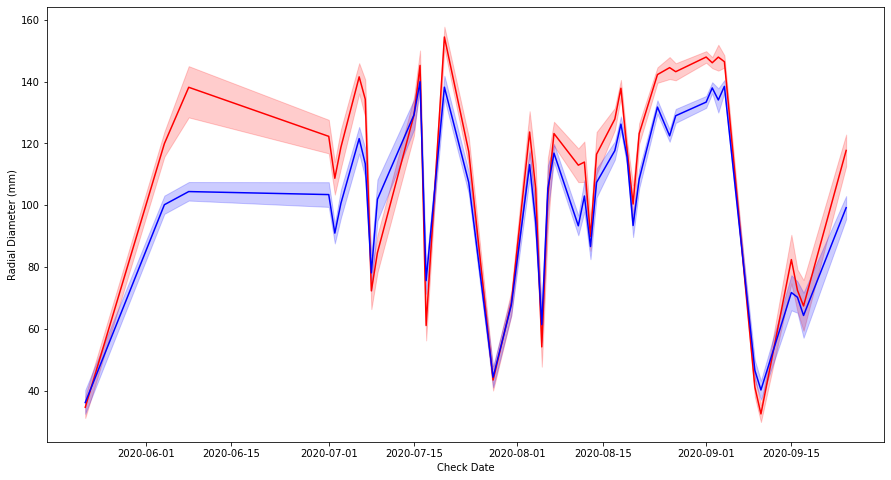

In [89]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="Check Date", y="Radial Diameter (mm)",color='r')
sns.lineplot(data=df, x="Check Date", y="Polar Diameter (mm)",color='b')
plt.savefig("time_analysis.png")
plt.show()

In [90]:
df.drop(columns=['Flight Date','Check Date','Plant Date','Weather Date'],inplace=True)

In [91]:
indices_to_drop = df[df['Leaves'].isnull()==False].index
df.drop(indices_to_drop,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 1 to 3293
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Batch Number             3199 non-null   float64
 1   Class                    3199 non-null   float64
 2   Fresh Weight (g)         3198 non-null   float64
 3   Head Weight (g)          3197 non-null   float64
 4   Radial Diameter (mm)     3197 non-null   float64
 5   Polar Diameter (mm)      3197 non-null   float64
 6   Leaves                   0 non-null      float64
 7   Leaf Area (cm^2)         3198 non-null   float64
 8   Square ID                3199 non-null   float64
 9   Flight_In_Dates          3199 non-null   float64
 10  Checked_In_Dates         3199 non-null   float64
 11  Flight Year              3199 non-null   float64
 12  Flight Month             3199 non-null   float64
 13  Solar Radiation [avg]    3199 non-null   int64  
 14  Precipitation [sum]     

In [92]:
df.drop(columns=['Leaves'],inplace=True)


In [93]:
val= df[df['Leaf Area (cm^2)'].isnull()==False]['Leaf Area (cm^2)'].median()
df['Leaf Area (cm^2)'].fillna(val,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3199 entries, 1 to 3293
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Batch Number             3199 non-null   float64
 1   Class                    3199 non-null   float64
 2   Fresh Weight (g)         3198 non-null   float64
 3   Head Weight (g)          3197 non-null   float64
 4   Radial Diameter (mm)     3197 non-null   float64
 5   Polar Diameter (mm)      3197 non-null   float64
 6   Leaf Area (cm^2)         3199 non-null   float64
 7   Square ID                3199 non-null   float64
 8   Flight_In_Dates          3199 non-null   float64
 9   Checked_In_Dates         3199 non-null   float64
 10  Flight Year              3199 non-null   float64
 11  Flight Month             3199 non-null   float64
 12  Solar Radiation [avg]    3199 non-null   int64  
 13  Precipitation [sum]      3199 non-null   float64
 14  Wind Speed [avg]        

In [94]:
val= df[df['Fresh Weight (g)'].isnull()==False]['Fresh Weight (g)'].median()
df['Fresh Weight (g)'].fillna(val,inplace=True)
val= df[df['Head Weight (g)'].isnull()==False]['Head Weight (g)'].median()
df['Head Weight (g)'].fillna(val,inplace=True)
val= df[df['Polar Diameter (mm)'].isnull()==False]['Polar Diameter (mm)'].median()
df['Polar Diameter (mm)'].fillna(val,inplace=True)
val= df[df['Radial Diameter (mm)'].isnull()==False]['Radial Diameter (mm)'].median()
df['Radial Diameter (mm)'].fillna(val,inplace=True)


### Applying Multi Output Regressor

In [95]:
df1=df.iloc[:,:3]
df2 = df.iloc[:,6:]
Y = df.iloc[:,3:6]
X= pd.concat([df1,df2],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

GBR = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
parameters = {'estimator': [GradientBoostingRegressor(random_state=0),Ridge(random_state=123),RandomForestRegressor(),DecisionTreeRegressor()],
                  'n_jobs' : [1,-1,-2]
                 }
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = None, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=0),
                     n_jobs=1)

 The best score across ALL searched params:
 0.9154730335644496

 The best parameters across ALL searched params:
 {'estimator': GradientBoostingRegressor(random_state=0), 'n_jobs': 1}


In [96]:
y_pred = MultiOutputRegressor(GradientBoostingRegressor(random_state=0),n_jobs=1).fit(X_train, y_train).predict(X_test)
r2_gbr=round(r2_score(y_test,y_pred),3)
print(r2_gbr)

0.909


In [97]:
y_pred = MultiOutputRegressor(Ridge(random_state=123),n_jobs=1).fit(X_train, y_train).predict(X_test)
r2_rr = round(r2_score(y_test,y_pred),3)


y_pred = MultiOutputRegressor(DecisionTreeRegressor(),n_jobs=1).fit(X_train, y_train).predict(X_test)
r2_dtr = round(r2_score(y_test,y_pred),3)


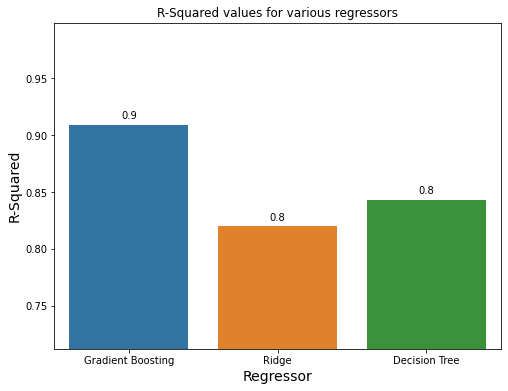

In [98]:

regs = ['Gradient Boosting', 'Ridge', 'Decision Tree']
r2 = [r2_gbr,r2_rr,r2_dtr]

df_disp = pd.DataFrame({'regs': regs,'r2':r2})

plt.figure(figsize=(8, 6))
splot=sns.barplot(x="regs",y="r2",data=df_disp)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Regressor", size=14)
plt.ylabel("R-Squared", size=14)

plt.ylim(0.712, 0.999)
plt.title("R-Squared values for various regressors")
plt.savefig("regs.png")
plt.show()

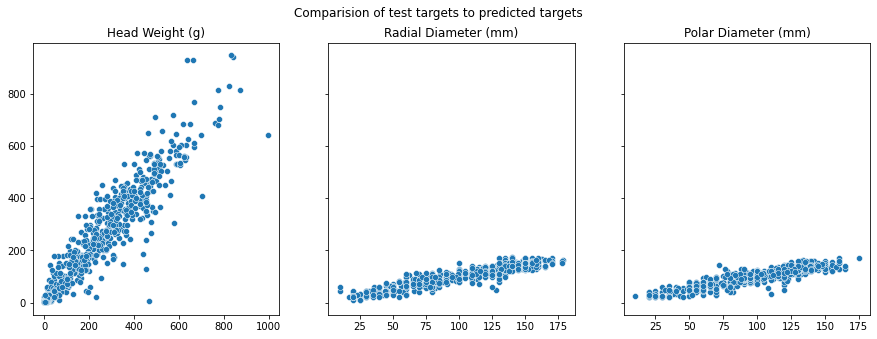

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Comparision of test targets to predicted targets')
sns.scatterplot(ax=axes[0],x=np.array(y_test)[:,0], y=y_pred[:,0])
axes[0].set_title(y_test.columns[0])
sns.scatterplot(ax=axes[1],x=np.array(y_test)[:,1], y=y_pred[:,1])
axes[1].set_title(y_test.columns[1])
sns.scatterplot(ax=axes[2],x=np.array(y_test)[:,2], y=y_pred[:,2])
axes[2].set_title(y_test.columns[2])
plt.savefig("result.png")
plt.show()